In [1]:
%run InitAndFuctions.ipynb

Host: b5ac3dd01194
3.6.8 (default, Nov 16 2020, 16:55:22) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-44)] <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7fdbc2dd9748>
Welcome to JupyROOT 6.22/06


In [2]:
#
# init run and debug paramas
#
# Bandella 

# KFC cosmici
runI          = [4035]
run_ped       = 4034

# KFC Fe
runI          = [4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047]
run_ped       = 4038

#runI          = [4045]
#run_ped       = 4038


# cimax         = 500 # normalemnte a 10 testa 500 per capire
# cimin         = 0 
# tag           = 'LAB'
# nsigma        = 1.5
# fiducial_cut  = 150 # pixel
# doRescale     = True
# debug         = False
# max_tarcks    = 20
# max_images    = -1 # -1 all 
# ###################################
# min_samples=2
# residual_threshold=3
# max_trials=1000
# random_state=42


runI          = [4039]
run_ped       = 4038

cimax         = 10
cimin         = 0 
tag           = 'LAB'
nsigma        = 0.5
fiducial_cut  = 150 # pixel
doRescale     = True
debug         = False
max_tarcks    = 20
max_images    = -1
###################################
min_samples=2
residual_threshold=2
max_trials=1000
random_state=42

In [3]:
run_info_logbook(runI[0], verbose=False)

File_Number                                      4039
saved_events                                      200
Exposure_Time_ms                                    1
comments                          55Fe - Z = 6-1=5 cm
Nominal_Flux_He_CF4                             60/40
He_CF4                                            NaN
Transfer_field_kV_cm                              2.5
GEM3_V                                            430
GEM2_V                                            440
GEM1_V                                            440
Calculated_GEM_stack_V                           1315
Requested_Drift_field_V_cm                        960
Calculated_Field_Cage_Anode_V                   316.8
Real_Field_Cage_Anode_V                           317
Calculated_Field_Cage_Catode_V                  49632
Calculated_Drift_Field_V_cm                   960.004
Name: 2961, dtype: object

rascale:  4
/workarea/cloud-storage/mazzitel/ped/run4038_mean.h5 /workarea/cloud-storage/mazzitel/ped/run4038_sigma.h5
light over Th: 9815004.83 
Open file: /workarea/cloud-storage/cygnus/Data/LAB/histograms_Run04039.root
Find Keys: 200
# of Images (TH2) Files: 200 
# of Waveform (TH2) Files: 0 
Camera X, Y pixel: 2304 2304 
Processing RUN:  4039 Event:  0
DEBUG: number of points, clusters: 9056 0
['iTr: 0.00', 'cluster_lable: 0.00', 'pixels: 9056.00', 'photons: 35454.40', 'ph_pixels: 3.92', 'x0start: 604.00', 'y0start: 148.00', 'x0end: 2140.00', 'y0end: 1636.00', 'length: 2138.56', 'mse: 2.26', 'r2: 1.00']
(array([219.06007067, 336.09010601]), array([0.69577681, 0.71825806]))
ph 35454, dim: 9056
x,y start: 604, 148, x,y stop: 2140, 1636, length: 2139: 
Mean squared error: 2.26
Coefficient of determination: 0.9996


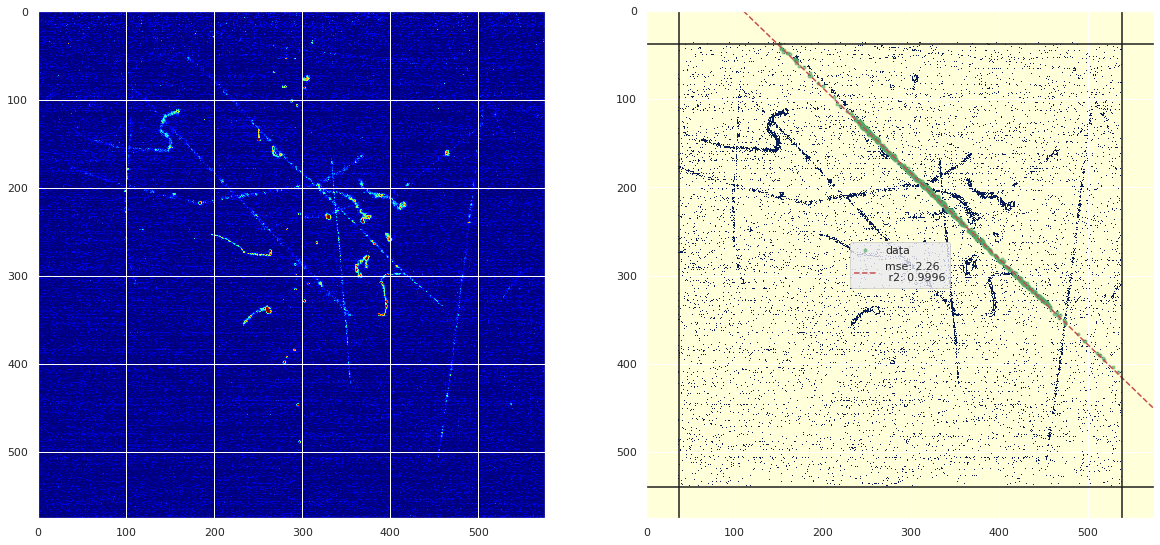

In [ ]:
version       = 'vL.1'
%run CosmicsLine.ipynb

In [ ]:
sns.set_context("paper", rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":14})   
fig, ax = plt.subplots(1,1, figsize=(10,5))
proj_xy(edges, y=False)
ax.axvline(fiducial_cut, color='k')
ax.axvline(edges.shape[0]-fiducial_cut, color='k')
plt.show()

# debug

In [ ]:
fig, ax = plt.subplots (1,2, figsize=(20,10))
ax[0].imshow(rebin_image, cmap='jet', vmin=0, vmax=20)
ax[1].imshow(edges, cmap='YlGnBu', vmin=0,vmax=1)
ax[1].plot(xc, yc, '.g', alpha=0.6,
label='Inlier data', markersize=6)
ax[1].plot(line_y_robust, line_x, '--r', label='Robust line model')
ax[1].set_xlim(0,rebin_image.shape[1]-1)
ax[1].set_ylim(rebin_image.shape[0]-1,0)
plt.show()

In [ ]:
def n_tarp(x, y, ax, image = np.array([]), n_std=3.0, facecolor='none', **kwargs):
    from matplotlib.patches import Rectangle
    mean_x = x.mean()
    mean_y = y.mean()
    std_x = x.std()
    std_y = y.std()
    half_width = n_std * std_x
    half_height = n_std * std_y
    if image.any():
        rimage = image*0
        xs = int(mean_x - half_width)+1
        xe = int(mean_x + half_width)+1
        ys = int(mean_y - half_height)+1
        ye = int(mean_y + half_height)+1
        # print(ys,ye, xs,xe)
        rimage[ys:ye, xs:xe]=image[ys:ye, xs:xe]
        # print (rimage)
        # print(rimage.sum())
        
    rectangle = Rectangle(
        (mean_x - half_width, mean_y - half_height),
        2 * half_width, 2 * half_height, facecolor=facecolor, **kwargs)
    return ax.add_patch(rectangle), rimage  


def n_std_rectangle(x, y, ax, image = np.array([]), n_std=3.0, facecolor='none', **kwargs):
    from matplotlib.patches import Rectangle
    mean_x = x.mean()
    mean_y = y.mean()
    std_x = x.std()
    std_y = y.std()
    half_width = n_std * std_x
    half_height = n_std * std_y
    if image.any():
        rimage = image*0
        xs = int(mean_x - half_width)+1
        xe = int(mean_x + half_width)+1
        ys = int(mean_y - half_height)+1
        ye = int(mean_y + half_height)+1
        # print(ys,ye, xs,xe)
        rimage[ys:ye, xs:xe]=image[ys:ye, xs:xe]
        # print (rimage)
        # print(rimage.sum())
        
    rectangle = Rectangle(
        (mean_x - half_width, mean_y - half_height),
        2 * half_width, 2 * half_height, facecolor=facecolor, **kwargs)
    return ax.add_patch(rectangle), rimage  

def confidence_ellipse(x, y, ax, image = np.array([]), n_std=3.0, facecolor='none', **kwargs):
    from matplotlib.patches import Ellipse
    import matplotlib.transforms as transforms
    import numpy as np

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    if image.any():
        # ellsisse e' (x-x0)**2/a**2 + (y-y0)**2/b**2 < 1
        # print (mean_x, mean_y, ell_radius_x*scale_x, ell_radius_y*scale_y)
        rimage = image*0
        ar = abs(pearson)
        for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                xr = (y-mean_y)*np.sin(ar)+(x-mean_x)*np.cos(ar)
                yr = (y-mean_y)*np.cos(ar)-(x-mean_x)*np.sin(ar)
                if (xr)**2/(ell_radius_x*scale_x)**2 + (yr)**2/(ell_radius_y*scale_y)**2 < 1:
                    rimage[y,x]=image[y, x]
        # print (rimage)
        # print(rimage.sum())
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)

    return ax.add_patch(ellipse), rimage 


def confidence_ellipse_par(x, y, image = np.array([]), n_std=3.0, facecolor='none', **kwargs):
    import numpy as np

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
                           
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
                           
    width=scale_x*ell_radius_x * 2 
    height=scale_y*ell_radius_y * 2              
    if image.any():
        # ellsisse e' (x-x0)**2/a**2 + (y-y0)**2/b**2 < 1
        # print (mean_x, mean_y, ell_radius_x*scale_x, ell_radius_y*scale_y)
        rimage = image*0
        ar = abs(pearson)
        for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                xr = (y-mean_y)*np.sin(ar)+(x-mean_x)*np.cos(ar)
                yr = (y-mean_y)*np.cos(ar)-(x-mean_x)*np.sin(ar)
                if (xr)**2/(ell_radius_x*scale_x)**2 + (yr)**2/(ell_radius_y*scale_y)**2 < 1:
                    rimage[y,x]=image[y, x]
        # print (rimage)
        # print(rimage.sum())
    else:
        rimage = np.array([])

    
    return width, height, pearson, rimage.sum(), np.size(rimage[rimage>0])


In [ ]:
for k in range(10):
    for i in range(xc.shape[0]):
        edges[int(yc[i]), int(xc[i])]=0
    points          = np.array(np.nonzero(edges)).T.astype(float)
    model = LineModelND()
    model.estimate(points)

    # robustly fit line only using inlier data with RANSAC algorithm
    model_robust, inliers = ransac(points, LineModelND, min_samples=2,
                                   residual_threshold=1, max_trials=1000)
    outliers = inliers == False

    # generate coordinates of estimated models
    line_x = np.arange(0, rebin_image.shape[1])
    line_y = model.predict_y(line_x)
    line_y_robust = model_robust.predict_y(line_x)

    xc = points[inliers, 1]
    yc = points[inliers, 0]
    fig, ax = plt.subplots (1,2, figsize=(20,10))
    ax[0].imshow(rebin_image, cmap='jet', vmin=0, vmax=20)
    ax[1].imshow(edges, cmap='YlGnBu', vmin=0,vmax=1)
    ax[1].plot(xc, yc, '.g', alpha=0.6,
    label='Inlier data', markersize=6)
    ax[1].plot(line_y_robust, line_x, '--r', label='Robust line model')
    ax[1].set_xlim(0,rebin_image.shape[1]-1)
    ax[1].set_ylim(rebin_image.shape[0]-1,0)
    plt.show()